> Projeto Desenvolve <br>
Programação Intermediária com Python <br>
Profa. Camila Laranjeira (mila@projetodesenvolve.com.br) <br>

# 4.2 - APIs


## Exercícios 🔭🌌🪐

Vamos acessar as APIs da NASA para ver algumas imagens interessantes capturadas universo afora!

#### Q1.
Crie uma chave no site oficial:
* https://api.nasa.gov

Vamos armazenar a chave de forma segura! <br>
Salve a sua chave em um arquivo `key.json` na forma:
`API_KEY=SUA_CHAVE`

Adicione o nome do arquivo `key.json` ao `.gitignore` do repositório que você fará upload da atividade.
Para isso basta abrir o arquivo `.gitignore` na pasta raíz do repositório (ou criar um caso ele não exista). Dentro do arquivo, apenas adiciona o nome do arquivo que deseja ignorar.

In [1]:
#%pip install requests matplotlib scikit-image

import requests
import json
import matplotlib.pyplot as plt
from skimage import io
import os

#def inicializar_arquivo_key():
with open('key.json', 'r') as fp:
    auth = json.load(fp)
API_KEY = auth['API_KEY']
#    return API_KEY

def carregar_api_key():

    try:
        with open('key.json', 'r') as f:
            data = json.load(f)
            return data['API_KEY']
    except FileNotFoundError:
        print("Arquivo key.json não encontrado!")
        return None

# API Key
#API_KEY = inicializar_arquivo_key()

#### Q2. 🛰 Astronomy Picture of the Day (APOD) 🌌
> Antes de fazer os exercícios, devo te lembrar que existem limites de acesso às APIs, descritas na página principal, portanto pega leve na tentativa e erro na hora de testar seu código.

<img width=500 src=https://apod.nasa.gov/apod/image/2407/M24-HaLRGB-RC51_1024.jpg>

A primeira API que acessaremos é a mais popular de todas: astronomy picture of the day (foto astronômica do dia).

Faça uma requisição GET para a URL da API que retorna a imagem do dia! Essa é fácil já que são os valores padrão da rota principal:
* URL base: `'https://api.nasa.gov/planetary/apod'`
* Endpoint: não precisa preencher, acessaremos a raíz da API.
* Query params: preencha `api_key` com a sua chave de autenticação. Se animar mexer em outros parâmetros veja [a documentação](https://api.nasa.gov).

Ao receber a resposta (um json), você deve:
* Imprimir os campos `copyright` e `explanation`
* Com as biblioteca scikit-images e matplotlib, apresente a imagem a partir do campo `url` ou `hdurl`, e preencha o título do plot com o campo `title` do json. Uma dica de código a seguir.
```python
from skimage import io
img = io.imread(url)
## plot a matriz img com matplotlib (imshow)
```   


ASTRONOMY PICTURE OF THE DAY



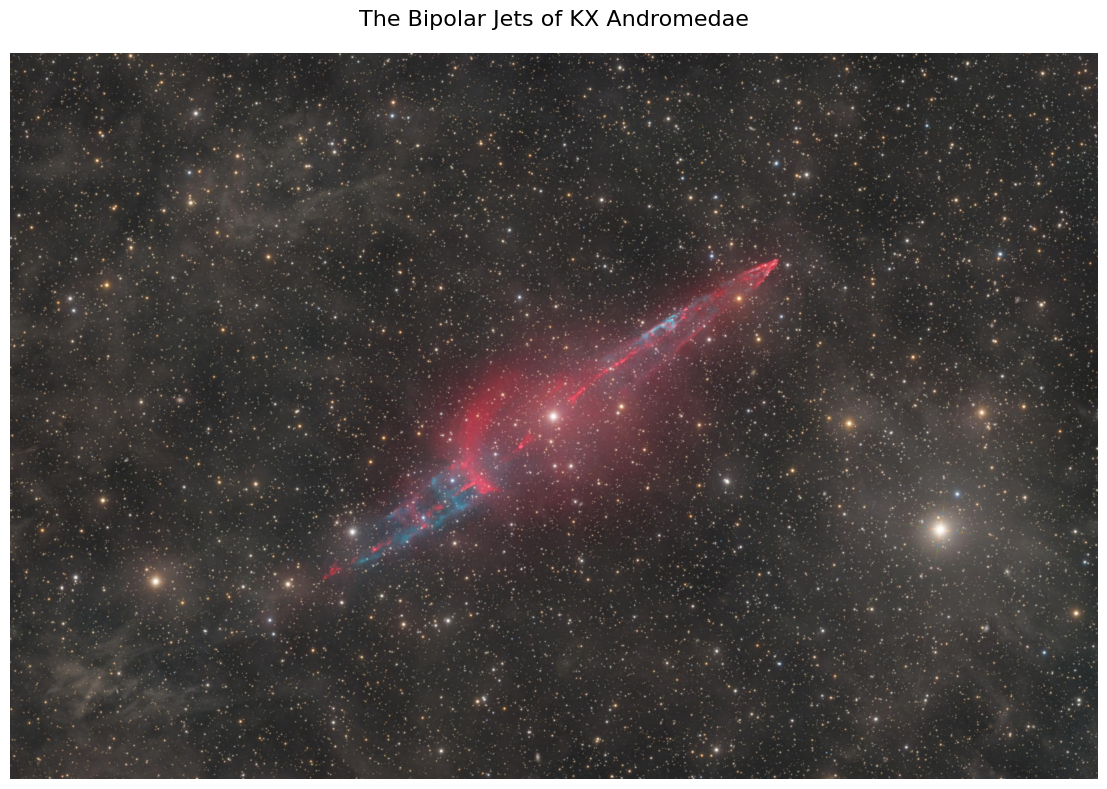

In [2]:
def obter_apod(api_key):

    # URL base da API APOD
    url_base = 'https://api.nasa.gov/planetary/apod'
    
    # Parâmetros da requisição
    params = {
        'api_key': api_key
    }
    
    # Fazendo a requisição GET
    response = requests.get(url_base, params=params)
    
    # Verificando se a requisição foi bem-sucedida
    if response.status_code == 200:
        return response
    else:
        print(f"Erro na requisição: {response.status_code}")
        return None

def exibir_apod(response):
  
    if response is None:
        return
    
    # Extraindo o JSON da resposta
    data = response.json()
    
    # Obtendo a URL da imagem (preferência por HD)
    img_url = data.get('hdurl', data.get('url'))
    
    # Verificando se é uma imagem (não vídeo)
    if data.get('media_type') == 'image':
        # Carregando a imagem
        img = io.imread(img_url)
        
        # Plotando a imagem
        plt.figure(figsize=(12, 8))
        plt.imshow(img)
        plt.title(data.get('title', 'Sem título'), fontsize=16, pad=20)
        plt.axis('off')
        plt.tight_layout()
        plt.show()
    else:
        print(f"\nMídia do tipo: {data.get('media_type')}")
        print(f"URL: {img_url}")

# Executando Q2
print("\n" + "="*80)
print("ASTRONOMY PICTURE OF THE DAY")
print("="*80 + "\n")

response_apod = obter_apod(API_KEY)
exibir_apod(response_apod)

#### Q3. Limites
A partir da resposta da query anterios, imprima o header da resposta e consulte os atributos:
* X-RateLimit-Limit: o limite total de requisições da sua chave de API
* X-RateLimit-Remaining: o limite restante de requisições da sua chave de API

In [3]:
def verificar_limites(response):
    
    if response is None:
        return
    
    print("\n" + "="*80)
    print("LIMITES DA API")
    print("="*80 + "\n")
    
    # Imprimindo todos os headers
    print("HEADERS DA RESPOSTA:")
    print("-" * 80)
    for key, value in response.headers.items():
        print(f"{key}: {value}")
    
    print("\n" + "="*80)
    print("INFORMAÇÕES DE LIMITE:")
    print("-" * 80)
    
    # Extraindo informações específicas de limite
    limite_total = response.headers.get('X-RateLimit-Limit', 'Não disponível')
    limite_restante = response.headers.get('X-RateLimit-Remaining', 'Não disponível')
    
    print(f"Limite Total (X-RateLimit-Limit): {limite_total}")
    print(f"Limite Restante (X-RateLimit-Remaining): {limite_restante}")
    print("="*80)

# Executando
verificar_limites(response_apod)


LIMITES DA API

HEADERS DA RESPOSTA:
--------------------------------------------------------------------------------
Date: Fri, 05 Dec 2025 19:55:13 GMT
Content-Type: application/json
Transfer-Encoding: chunked
Connection: keep-alive
Access-Control-Allow-Origin: *
Access-Control-Expose-Headers: X-RateLimit-Limit, X-RateLimit-Remaining
Age: 0
Content-Encoding: gzip
Strict-Transport-Security: max-age=31536000; includeSubDomains; preload
Vary: Accept-Encoding
Via: https/1.1 api-umbrella (ApacheTrafficServer [cMsSf ])
X-Api-Umbrella-Request-Id: cqu0ajekekv0dnvnjih0
X-Cache: MISS
X-Content-Type-Options: nosniff
X-Ratelimit-Limit: 4000
X-Ratelimit-Remaining: 3999
X-Vcap-Request-Id: 596656c5-2ab8-4b75-7f9e-ed77fe746d8d
X-Frame-Options: DENY

INFORMAÇÕES DE LIMITE:
--------------------------------------------------------------------------------
Limite Total (X-RateLimit-Limit): 4000
Limite Restante (X-RateLimit-Remaining): 3999


### Q4. Mars Rover Photos 🚀🚙 📷

<img width=500 src=https://www.nasa.gov/wp-content/uploads/2019/10/pia23378-16.jpg>

Essa API retorna dados (incluindo imagens capturadas) sobre os veículos que hoje habitam o planeta Marte. São os rovers `opportunity`, `spirit` e o mais famoso, o `curiosity` (da foto acima).

Antes de requisitar imagens, vamos ver o relatório de dados coletados por um deles, o `curiosity`. Isso vai nos ajudar a montar a query de imagens coletadas.

Faça uma requisição GET para a seguinte URL:
* URL base: `'https://api.nasa.gov/mars-photos/api/v1'`
* endpoint: `'/manifests/{nome_do_rover}'`
* query parameters: preencha `api_key` com a sua chave de autenticação.

Extraia o json da resposta retornada. O campo principal é o `'photo_manifest'`, do qual queremos acessar os seguintes valores:
* `max_sol`: Máximo "dia marciano" de coleta de fotos. O dia marciano tem 24 horas, 39 minutos e 35 segundos.
* `max_date`: Última data terrestre de coleta de fotos, na forma `'aaaa-mm-dd'`.

Imprima esses dois atributos da resposta e os use no próximo exercício para coletar as fotos mais recentes tiradas. 

In [ ]:
# Função correta para carregar a API Key do mesmo diretório do script, **está em gitignore

def carregar_api_key():

    caminho_key = os.path.join(os.getcwd(), "key.json")

    try:
        with open(caminho_key, 'r') as f:
            data = json.load(f)
            return data["API_KEY"]
    except Exception as e:
        print("Erro ao carregar API KEY:", e)
        return None
    
API_KEY = carregar_api_key()


# Chamada api
def consultar_manifesto(rover="curiosity"):
    url = f"https://api.nasa.gov/mars-photos/api/v1/manifests/{rover}/latest_photos?api_key={API_KEY}"
    print (rover)
    
    #params = {"api_key": API_KEY} # linha 'params' comentada pois estou passando a key manualmente na URL

    response = requests.get(url)

    
     #Verifica se a requisição deu certo
    if response.status_code != 200:
        print("Erro na requisição:", response.status_code)
        return
    
    data = response.json()

    for photo in data["latest_photos"]:
        print("URL da Imagem:", photo["img_src"])

    # O campo principal pedido no exercício
    manifest = data.get("photo_manifest", {})

    max_sol = manifest.get("max_sol")
    max_date = manifest.get("max_date")

    print("\n===== Manifesto do Rover", rover.capitalize(), "=====")
    print("Último sol (max_sol):", max_sol)
    print("Última data terrestre (max_date):", max_date)

    return max_sol, max_date

#Exe
consultar_manifesto()


curiosity
Erro na requisição: 404


#### Q5.

Faça uma requisição GET para a URL da API que retorna links para as imagens coletadas pelos rovers.

* URL base: `'https://api.nasa.gov/mars-photos/api/v1'`
* Endpoint: `/rovers/{nome_do_rover}/photos`
* Query params sugeridos: 
    * `api_key`: sua chave de autenticação.
    * `sol`: dia marciano que deseja coletar (de 0 a `max_sol` coletado anteriormente)
    * `page`: você pode paginar entre as respostas! São retornados 25 resultados por página.

A resposta esperada estará no formato a seguir, uma lista no campo `'photos'` onde cada item é um dicionário com os dados da foto tirada. Dentre os dados há o campo `camera` indicando qual das câmeras do rover tirou a foto. As fotos mais interessantes (na minha opinião, claro) são das câmeras de navegação (`"name": "NAVCAM"`) e as de prevenção de colisão (frente: `"name": "FHAZ"` e trás `"name": "RHAZ"`) onde dá pra ver partes do robô!

**Seu trabalho é**:
* Paginar a requisição acima até que a resposta seja `None`
* Escolher uma ou mais câmeras (ex: `NAVCAM`, `FHAZ`, `RHAZ`), e em um laço de repetição plotar todas as imagens retornadas daquela câmera. Use novamente as bibliotecas scikit-image e matplotlib. 
  * O título da imagem deve ter a página da requisição, nome da câmera e id da imagem.

```json
{
  "photos": [
    {
      "id": 1228212,
      "sol": 4102,
      "camera": {
        "id": 20,
        "name": "FHAZ",
        "rover_id": 5,
        "full_name": "Front Hazard Avoidance Camera"
      },
      "img_src": "https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/04102/opgs/edr/fcam/FLB_761645828EDR_F1060660FHAZ00302M_.JPG",
      "earth_date": "2024-02-19",
      "rover": {
        "id": 5,
        "name": "Curiosity",
        ...
      }
    }
    {
      "id": 1228213,
      "sol": 4102, 
      ...
    }
```



In [ ]:
def obter_fotos_rover(nome_rover, api_key, sol, page=1):
    """
    Obtém fotos de um rover marciano para um sol específico.
    
    Args:
        nome_rover (str): Nome do rover
        api_key (str): Chave de autenticação
        sol (int): Dia marciano (0 até max_sol)
        page (int): Número da página (25 resultados por página)
        
    Returns:
        dict: Resposta JSON com lista de fotos no campo 'photos'
        
    Nota:
        A API retorna 25 fotos por página. Use paginação para obter todas.
        Cada foto tem informações sobre câmera, data e URL da imagem.
    """
    # URL base e endpoint
    url_base = 'https://api.nasa.gov/mars-photos/api/v1'
    endpoint = f'/rovers/{nome_rover}/latest_photos?api_key={API_KEY}'
    url_completa = url_base + endpoint
    
    # Parâmetros
    params = {
        #'api_key': api_key,   #passando manualmente na URL acima
        'sol': sol,
        'page': page
    }
    
    # Requisição GET
    response = requests.get(url_completa, params=params)
    
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Erro na requisição: {response.status_code}")
        return None

def exibir_fotos_por_camera(nome_rover, api_key, sol, cameras=['NAVCAM', 'FHAZ', 'RHAZ'], max_fotos=10):
    """
    Pagina através das fotos e exibe aquelas das câmeras especificadas.
    
    Args:
        nome_rover (str): Nome do rover
        api_key (str): Chave de autenticação
        sol (int): Dia marciano para buscar fotos
        cameras (list): Lista de nomes de câmeras para filtrar
        max_fotos (int): Número máximo de fotos a exibir por câmera
        
    Note:
        Câmeras disponíveis:
        - NAVCAM: Navigation Camera (câmera de navegação)
        - FHAZ: Front Hazard Avoidance Camera (frontal)
        - RHAZ: Rear Hazard Avoidance Camera (traseira)
        - MAST: Mast Camera
        - CHEMCAM: Chemistry Camera
    """
    print("\n" + "="*80)
    print("FOTOS DO MARS ROVER")
    print("="*80 + "\n")
    
    page = 1
    fotos_por_camera = {cam: [] for cam in cameras}
    
    # Paginando através das respostas
    while True:
        print(f"Buscando página {page}...")
        data = obter_fotos_rover(nome_rover, api_key, sol, page)
        
        # Se não há dados ou a lista de fotos está vazia, parar
        if data is None or not data.get('photos'):
            print(f"Fim da paginação na página {page}")
            break
        
        # Filtrar fotos pelas câmeras desejadas
        for foto in data['photos']:
            camera_name = foto['camera']['name']
            if camera_name in cameras:
                fotos_por_camera[camera_name].append(foto)
        
        page += 1
    
    # Exibir estatísticas
    print("\n" + "-"*80)
    print("ESTATÍSTICAS DAS FOTOS COLETADAS:")
    print("-"*80)
    for camera, fotos in fotos_por_camera.items():
        print(f"{camera} ({foto['camera']['full_name'] if fotos else 'N/A'}): {len(fotos)} fotos")
    print("="*80)
    
    # Plotar as fotos
    for camera in cameras:
        fotos = fotos_por_camera[camera][:max_fotos]
        
        if not fotos:
            print(f"\nNenhuma foto encontrada para a câmera {camera}")
            continue
        
        print(f"\nExibindo {len(fotos)} fotos da câmera {camera}:")
        
        for foto in fotos:
            try:
                # Carregar imagem
                img = io.imread(foto['img_src'])
                
                # Criar título informativo
                titulo = f"Página {page} | {camera} | ID: {foto['id']}\n"
                titulo += f"Sol: {foto['sol']} | Data: {foto['earth_date']}"
                
                # Plotar
                plt.figure(figsize=(10, 8))
                plt.imshow(img)
                plt.title(titulo, fontsize=12, pad=15)
                plt.axis('off')
                plt.tight_layout()
                plt.show()
                
                print(f"  ✓ Foto ID {foto['id']} exibida com sucesso")
                
            except Exception as e:
                print(f"  ✗ Erro ao carregar foto ID {foto['id']}: {e}")

# Usando um sol mais antigo para garantir que há fotos disponíveis
# Você pode usar max_sol se preferir as fotos mais recentes
sol_escolhido = 1000  # Ou use: max_sol

print(f"\nBuscando fotos do sol {sol_escolhido}...")
exibir_fotos_por_camera('curiosity', API_KEY, sol_escolhido, 
                        cameras=['NAVCAM', 'FHAZ', 'RHAZ'], 
                        max_fotos=3)




Buscando fotos do sol 1000...

FOTOS DO MARS ROVER

Buscando página 1...
rover: curiosity
Erro na requisição: 404
Fim da paginação na página 1

--------------------------------------------------------------------------------
ESTATÍSTICAS DAS FOTOS COLETADAS:
--------------------------------------------------------------------------------
NAVCAM (N/A): 0 fotos
FHAZ (N/A): 0 fotos
RHAZ (N/A): 0 fotos

Nenhuma foto encontrada para a câmera NAVCAM

Nenhuma foto encontrada para a câmera FHAZ

Nenhuma foto encontrada para a câmera RHAZ
